# House Sales in King County, USA

Predicting House Prices: Multiple Linear Regression(WLS from statsmodels) and ANN approach (Keras)
Author: Julita Cichońska

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset

We are going to use dataset of real estate data from https://www.kaggle.com/harlfoxem/housesalesprediction

In [2]:
dataset = pd.read_csv('kc_house_data.csv')

### Overview

In [3]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Missing values

In [5]:
dataset.isnull().values.any()

False

### Feature selection (no.1)

We are going to drop unnecessary variables: technical and those which we are not going to use in this model (zipcode is categorical variable, which is highly correlated with longitude and lattitude).

In [6]:
df_raw = dataset.drop(['id', 'date','zipcode'], axis=1)

## EDA

### Prices by location

<AxesSubplot:xlabel='long', ylabel='lat'>

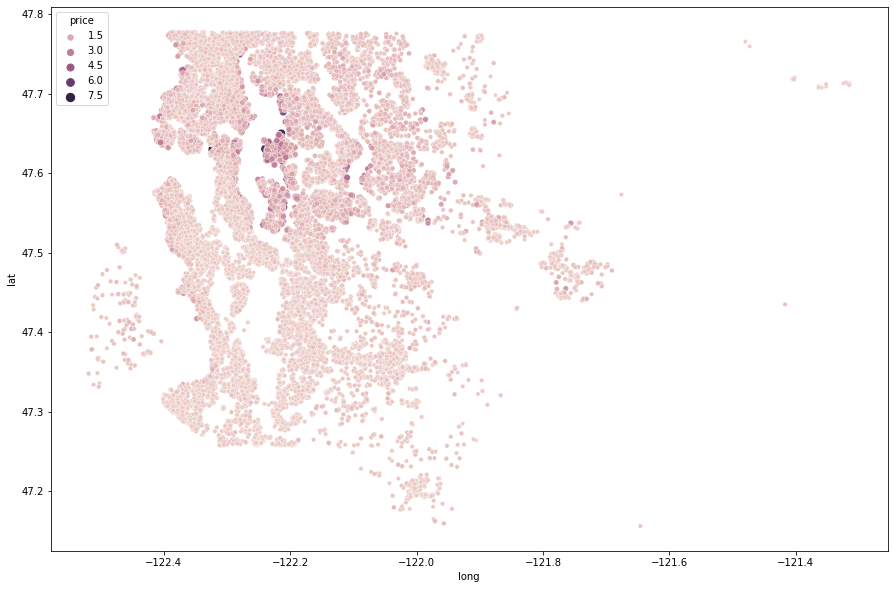

In [7]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = df_raw, x = 'long', y = 'lat', hue = 'price', size = 'price' )

Because there is clearly lack of linear relationship between longitude, lattitude and response variable, we will drop those variables, as we want to avoid our model to struggle with attempt to fit least square regression to those data. Later, we will use those variables in Neural Network Model.

In [8]:
df_raw = df_raw.drop(['lat', 'long'], axis=1)

### Response variable & outliers

Distribution of response variable (price):

<AxesSubplot:xlabel='price', ylabel='Count'>

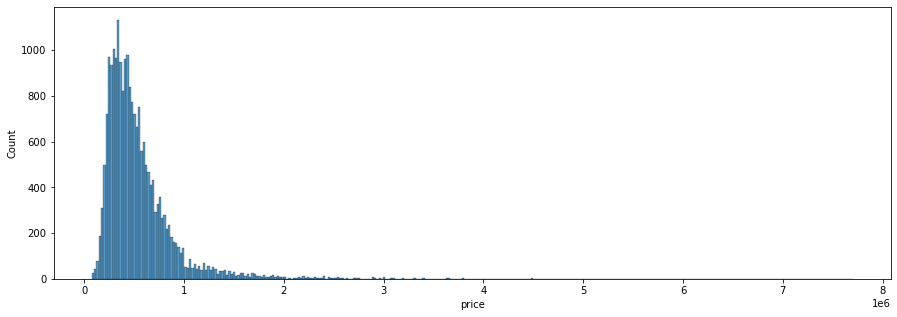

In [9]:
plt.figure(figsize=(15,5))
sns.histplot( x=df_raw.price)

We need to take care of outliers. To keep things simple, we are going to delete about 6% of most extreme observations (2% lowest, 4% highest)

In [10]:
q = np.quantile(df_raw.price, q = np.linspace(0,1, num = 50))
print(q[1])
print(q[-3])

176000.0
1250000.0


In [11]:
df = df_raw[(df_raw['price']>q[1]) & (df_raw['price']<q[-3])]

Lets check response variable after trimming:

<AxesSubplot:xlabel='price', ylabel='Count'>

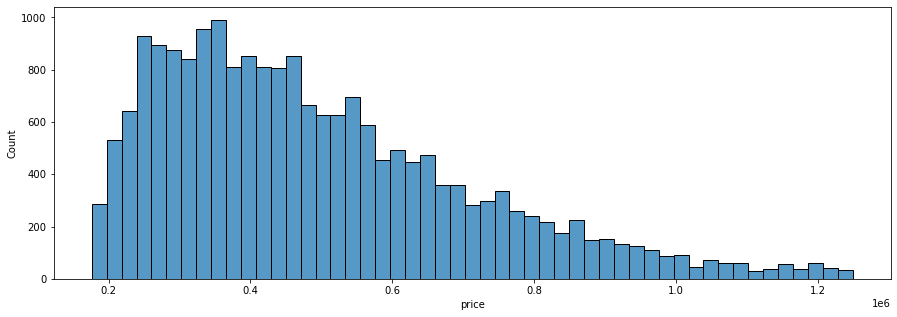

In [12]:
plt.figure(figsize=(15,5))
sns.histplot( x=df.price)

### Variables distribution

#### integer and categorical variables

<AxesSubplot:xlabel='grade', ylabel='count'>

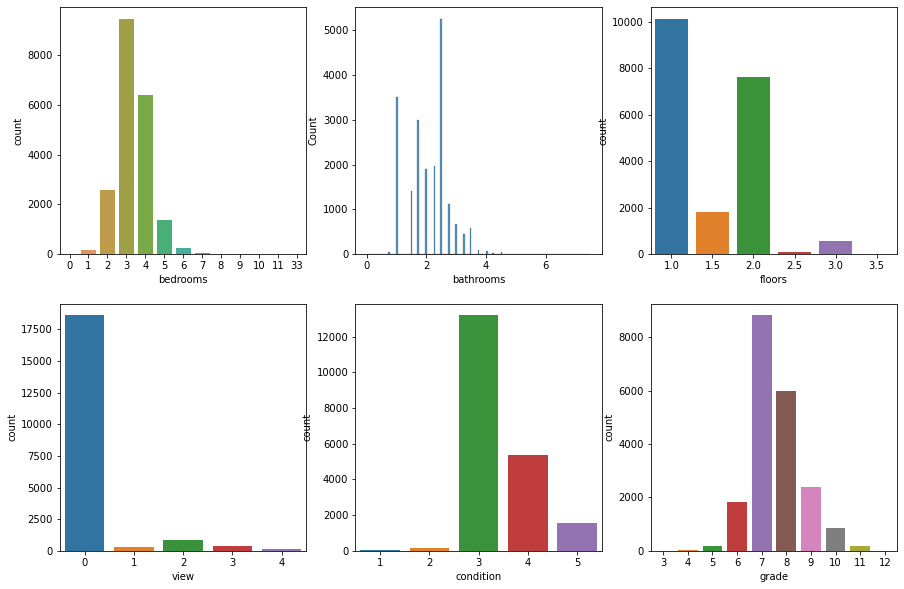

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=False)

sns.countplot(ax=axes[0,0], x=df.bedrooms)
sns.histplot(ax=axes[0,1], x=df.bathrooms)
sns.countplot(ax=axes[0,2], x=df.floors)
sns.countplot(ax=axes[1,0], x=df.view)
sns.countplot(ax=axes[1,1], x=df.condition)
sns.countplot(ax=axes[1,2], x=df.grade)

In [14]:
#cleaning
df = df[df['bedrooms']<33]

Although variables like view or condition are in fact categorical, they were coded as numerical and represent specific order so we will keep them as they are.

#### continuous variables

<AxesSubplot:xlabel='sqft_lot15', ylabel='Count'>

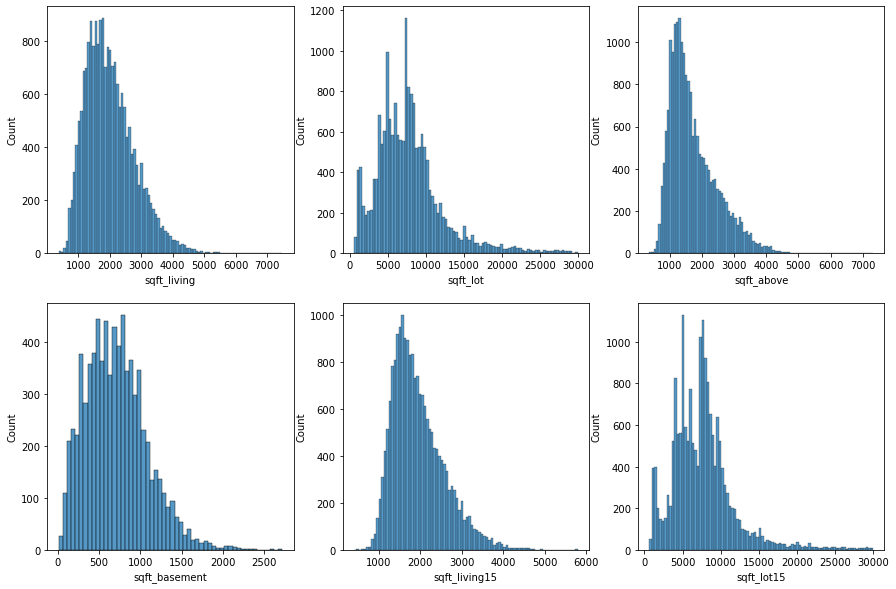

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=False)

sns.histplot(ax=axes[0,0], x=df.sqft_living)
sns.histplot(ax=axes[0,1], x=df.loc[df['sqft_lot']< 30000,'sqft_lot'])
sns.histplot(ax=axes[0,2], x=df.sqft_above)
sns.histplot(ax=axes[1,0], x=df.loc[df['sqft_basement']>0,'sqft_basement'])
sns.histplot(ax=axes[1,1], x=df.sqft_living15)
sns.histplot(ax=axes[1,2], x=df.loc[df['sqft_lot15']< 30000,'sqft_lot15'])

In [16]:
#cleaning
df = df[df['sqft_lot']<30000]
df = df[df['sqft_lot15']<30000]

#### Time variables

<AxesSubplot:xlabel='yr_renovated', ylabel='Count'>

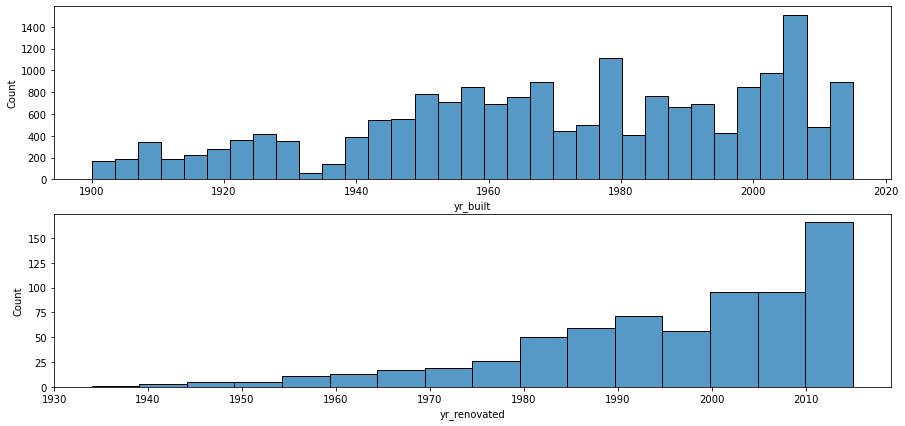

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(15, 7), sharey=False)

sns.histplot(ax=axes[0], x=df.yr_built)
sns.histplot(ax=axes[1], x=df.loc[df['yr_renovated']!=0, 'yr_renovated'])

Although those variables represent time, there is no need for transformation, because they represent proper numerical order, and coding them as "number of years from" would be useful only when deploying model for production environment and obtaining predictions for new data. For the purpuse of this toy model we will keep them without any changes.

#### Logical variables

In [18]:
df['waterfront'].value_counts()

0    18552
1       48
Name: waterfront, dtype: int64

## Multiple Linear Regression Model (Weighted)

### Train Test Split

In [19]:
X = df.drop('price', axis = 1)
y = df['price']

np.random.seed(2021)
from sklearn.model_selection import train_test_split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.3)

print('X_train_raw shape: ', X_train_raw.shape)
print('X_test_raw shape: ', X_test_raw.shape)

X_train_raw shape:  (13020, 15)
X_test_raw shape:  (5580, 15)


### Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

### Features selection

We need to identify independent variables, which are highly correlated. We will use hierarchical clustering to do that. After recognizing clusters of correlated variables we will leave only one variable from each cluster.

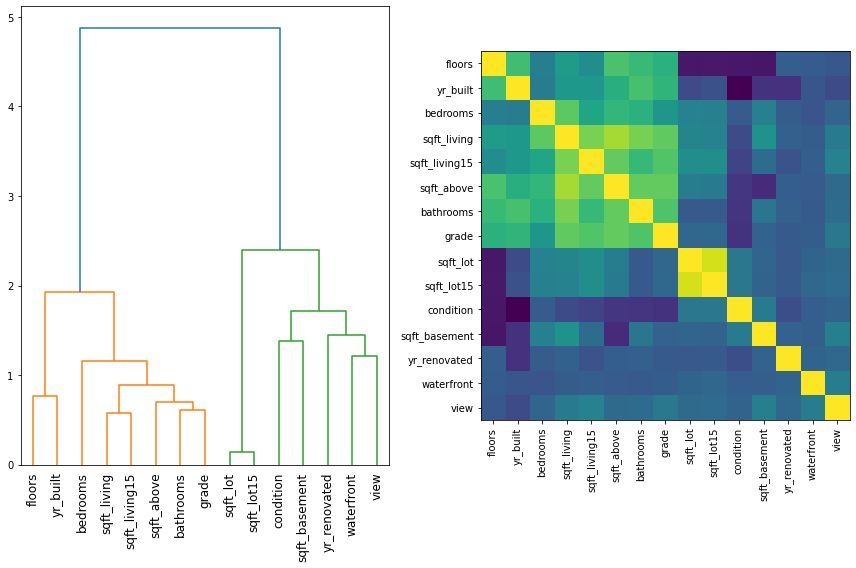

In [21]:
from scipy import stats
from scipy.cluster import hierarchy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = stats.spearmanr(X_train).correlation
corr_linkage = hierarchy.ward(corr)
dendro = hierarchy.dendrogram(
    corr_linkage, labels=X.columns, ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro['ivl']))

ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
ax2.set_yticklabels(dendro['ivl'])
fig.tight_layout()
plt.show()



We need to arbitrarily choose linkage cutoff to determine number of clusters.

In [22]:
from collections import defaultdict
cluster_ids = hierarchy.fcluster(corr_linkage, 0.7, criterion='distance')
cluster_id_to_feature_ids = defaultdict(list)

print('Cluster assignment for each variable: ',cluster_ids)

Cluster assignment for each variable:  [ 5  4  3  6  1  9 10  7  4  4  8  2 11  3  6]


In [23]:
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]
selected_variables = list(X.columns[selected_features])

print('Selected variables: \n', selected_variables)

Selected variables: 
 ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated']


In [24]:
X_train_sel = X_train[:,selected_features]
X_test_sel = X_test[:,selected_features]

### Model fitting

To avoid heteroscedacity of errors, we will train weighted least squares model. Our model will be weighted by reciprocal of  sqft_living.

In [25]:
import statsmodels.api as sm
X_train_c = sm.add_constant(X_train_sel)
X_test_c = sm.add_constant(X_test_sel)

w = X_train_raw.sqft_living.values

#lin_reg = sm.OLS(y_train, X_train_c)
lin_reg = sm.WLS(y_train, X_train_c, weights = 1/w)

results = lin_reg.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.449
Model:                            WLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     963.6
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:01:28   Log-Likelihood:            -1.7360e+05
No. Observations:               13020   AIC:                         3.472e+05
Df Residuals:                   13008   BIC:                         3.473e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.85e+05   1358.493    356.981      0.0

We will drop variable x11 which is insignificant, and train the model again.

In [26]:
X_train_c = np.delete(X_train_c, 11, axis=1)
X_test_c = np.delete(X_test_c, 11, axis=1)

w = X_train_raw.sqft_living.values

#lin_reg = sm.OLS(y_train, X_train_c)
lin_reg = sm.WLS(y_train, X_train_c, weights = 1/w)

results = lin_reg.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.449
Model:                            WLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     1060.
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:01:28   Log-Likelihood:            -1.7360e+05
No. Observations:               13020   AIC:                         3.472e+05
Df Residuals:                   13009   BIC:                         3.473e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.85e+05   1358.446    356.994      0.0

### VIF

Lets calculate Variance Inflation Factor to examine collinearity among predictors.

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

df_vif = pd.DataFrame(X_train_sel, columns=selected_variables)
#print(df_vif)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
vif["features"] = df_vif.columns
print(vif)

    VIF Factor       features
0     1.694580       bedrooms
1     3.018082      bathrooms
2     3.202450    sqft_living
3     1.366562       sqft_lot
4     2.268090         floors
5     1.104766     waterfront
6     1.196316           view
7     1.237402      condition
8     1.788962  sqft_basement
9     2.081362       yr_built
10    1.129828   yr_renovated


For the purpose of this small toy project result is satisfying.

### Prediction

In [28]:
y_train_pred = results.predict(X_train_c)
y_test_pred = results.predict(X_test_c)

train_result = pd.DataFrame({'y_real':y_train, 'y_pred':y_train_pred, 'set': 'train' })
test_result = pd.DataFrame({'y_real':y_test, 'y_pred':y_test_pred, 'set': 'test' })

df_result = pd.concat([train_result, test_result] )
df_result['idx'] = df_result.index

df_result['residual'] = df_result['y_real'] - df_result['y_pred']

### Diagnostics

#### Basic metrics

In [29]:
from sklearn import metrics
df_g = df_result.groupby('set')

print('\n R Sq')
print(df_g.apply(lambda x: metrics.r2_score(x['y_real'], x['y_pred'])))

print('\n Root Mean Squared Error')
print(df_g.apply(lambda x: round(metrics.mean_squared_error(x['y_real'], x['y_pred'],squared=False),2)))

print('\n Mean Absolute Error')
print(df_g.apply(lambda x: round(metrics.mean_absolute_error(x['y_real'], x['y_pred']),2)))


 R Sq
set
test     0.483712
train    0.474316
dtype: float64

 Root Mean Squared Error
set
test     153732.65
train    156257.64
dtype: float64

 Mean Absolute Error
set
test     120681.33
train    122432.64
dtype: float64


#### Distribution of Residuals

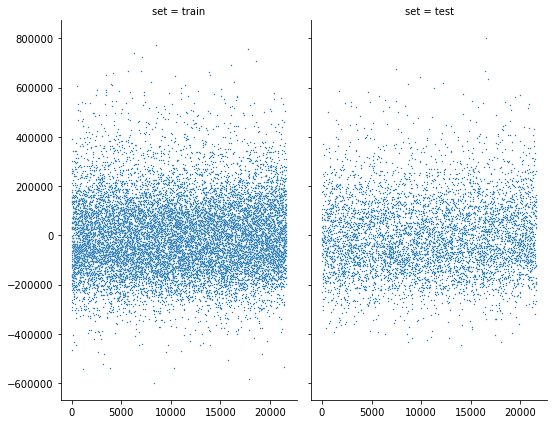

In [30]:
g = sns.FacetGrid(df_result,  col="set",height=6, aspect=.65)
g.map_dataframe(sns.scatterplot, x = 'idx', y = 'residual', s = 2)

#### Homoscedacity of residuals

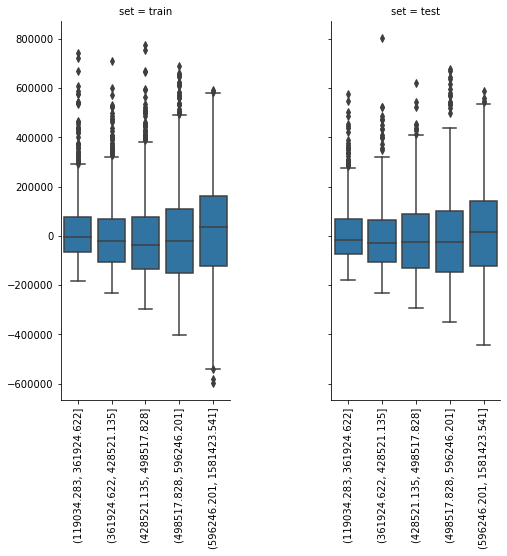

In [31]:
df_result['y_pred_cut'] = pd.qcut(df_result['y_pred'], 5)

g = sns.FacetGrid(df_result,  col="set",height=6, aspect=.65)
g.map_dataframe(sns.boxplot, x = 'y_pred_cut', y = 'residual')
g.set_xticklabels(rotation=90)

There are signs of heteroscedacity of errors - perhaps we should consider different weights in model, or perform some transformations of independent variables. We could also transform response variable, but this would result with complications in interpretation of model results (y would be on different scale and transformationsons of diagnostic metric would be needed).

#### Normality of residuals

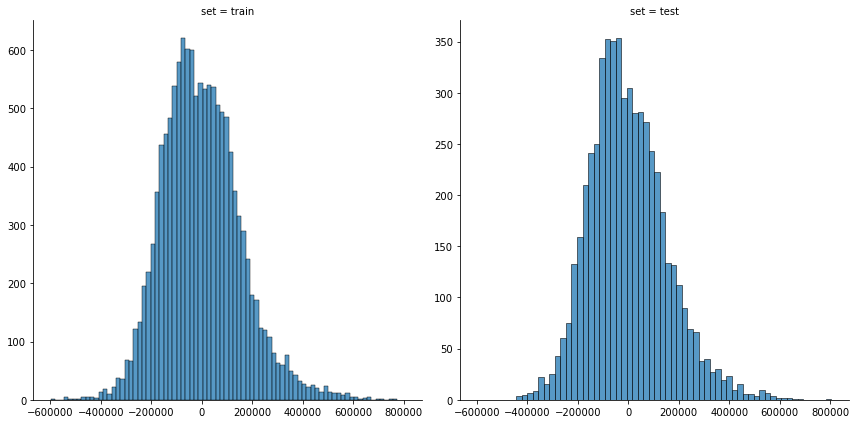

In [32]:
g = sns.FacetGrid(df_result,  col="set",height=6, aspect=1, sharey=False)
g.map_dataframe(sns.histplot, x = 'residual')


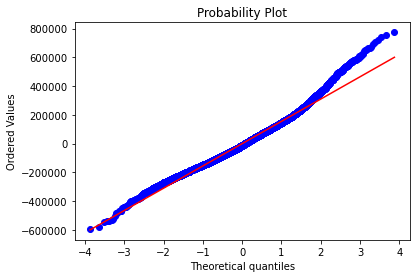

In [33]:
from scipy import stats
# TRAIN
data_points = df_result.loc[df_result['set']=='train', 'residual'].values
_,res1 = stats.probplot(x = data_points, dist="norm", plot=plt)


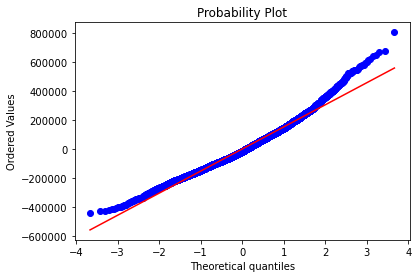

In [34]:
# TEST
data_points = df_result.loc[df_result['set']=='test', 'residual'].values
_,res2 = stats.probplot(x = data_points, dist="norm", plot=plt)

We can observe some skewness, but the distributions are close to normal and there is no signs of overfitting.

## Model ANN

Now we will build Artificial Neural Network model to compare performance between linear and non-linear model.

### Train, Val, Test Split

We will use original dataset with zipcode, longitude and latidude.

In [35]:
df_nn = dataset[(dataset['price']>q[1]) & (dataset['price']<q[-3])]

X = df_nn.drop(['id', 'date','price'], axis=1)
y = df_nn['price']



np.random.seed(2021)
from sklearn.model_selection import train_test_split
X_learn, X_test_raw, y_learn, y_test = train_test_split(X, y, test_size=0.3)
X_train_raw, X_val_raw, y_train, y_val = train_test_split(X_learn, y_learn, test_size=0.3)


print('X_train_raw shape: ', X_train_raw.shape)
print('X_val_raw shape: ', X_val_raw.shape)
print('X_test_raw shape: ', X_test_raw.shape)

X_train_raw shape:  (9933, 18)
X_val_raw shape:  (4257, 18)
X_test_raw shape:  (6082, 18)


In [36]:
scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_val = scaler.transform(X_val_raw)
X_test = scaler.transform(X_test_raw)

### Model setup

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

ann_model = Sequential()

ann_model.add(Dense(64, activation = 'relu'))
ann_model.add(Dense(64, activation = 'relu'))
ann_model.add(Dense(64, activation = 'relu'))
ann_model.add(Dense(1))

ann_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

callback = EarlyStopping(monitor='loss', patience=5)

### Fitting a model

In [38]:
history = ann_model.fit(x=X_train, 
           y=y_train.values, 
           batch_size=256, 
           epochs=300, 
           verbose=1, 
           callbacks=[callback], 
           validation_data=(X_val, y_val.values)
           )


Epoch 1/300
39/39 [==============================] - 0s 5ms/step - loss: 290749054976.0000 - mae: 493093.0000 - val_loss: 283716714496.0000 - val_mae: 487526.3750
Epoch 2/300
39/39 [==============================] - 0s 2ms/step - loss: 290691612672.0000 - mae: 493040.0312 - val_loss: 283565391872.0000 - val_mae: 487388.2188
Epoch 3/300
39/39 [==============================] - 0s 2ms/step - loss: 290268119040.0000 - mae: 492664.0938 - val_loss: 282701824000.0000 - val_mae: 486619.7812
Epoch 4/300
39/39 [==============================] - 0s 2ms/step - loss: 288524697600.0000 - mae: 491131.7500 - val_loss: 279703486464.0000 - val_mae: 483984.3125
Epoch 5/300
39/39 [==============================] - 0s 1ms/step - loss: 283456339968.0000 - mae: 486727.5625 - val_loss: 272106635264.0000 - val_mae: 477282.3125
Epoch 6/300
39/39 [==============================] - 0s 2ms/step - loss: 272240623616.0000 - mae: 476820.0312 - val_loss: 256818282496.0000 - val_mae: 463479.6250
Epoch 7/300
39/39 [===

Epoch 52/300
39/39 [==============================] - 0s 2ms/step - loss: 15618172928.0000 - mae: 91119.9844 - val_loss: 14428445696.0000 - val_mae: 89046.4766
Epoch 53/300
39/39 [==============================] - 0s 2ms/step - loss: 15500163072.0000 - mae: 90789.7344 - val_loss: 14334108672.0000 - val_mae: 88747.3984
Epoch 54/300
39/39 [==============================] - 0s 2ms/step - loss: 15395849216.0000 - mae: 90471.9531 - val_loss: 14247774208.0000 - val_mae: 88467.6641
Epoch 55/300
39/39 [==============================] - 0s 2ms/step - loss: 15296657408.0000 - mae: 90202.9609 - val_loss: 14168602624.0000 - val_mae: 88189.3281
Epoch 56/300
39/39 [==============================] - 0s 2ms/step - loss: 15203600384.0000 - mae: 89915.3047 - val_loss: 14084116480.0000 - val_mae: 87891.4844
Epoch 57/300
39/39 [==============================] - 0s 2ms/step - loss: 15117644800.0000 - mae: 89585.2031 - val_loss: 14016646144.0000 - val_mae: 87665.4844
Epoch 58/300
39/39 [====================

Epoch 154/300
39/39 [==============================] - 0s 2ms/step - loss: 13035957248.0000 - mae: 82655.0000 - val_loss: 12349211648.0000 - val_mae: 81667.8750
Epoch 155/300
39/39 [==============================] - 0s 2ms/step - loss: 13026354176.0000 - mae: 82529.0391 - val_loss: 12341394432.0000 - val_mae: 81660.2422
Epoch 156/300
39/39 [==============================] - 0s 2ms/step - loss: 13021739008.0000 - mae: 82649.2578 - val_loss: 12337896448.0000 - val_mae: 81555.8359
Epoch 157/300
39/39 [==============================] - 0s 2ms/step - loss: 13010579456.0000 - mae: 82480.8359 - val_loss: 12338997248.0000 - val_mae: 81624.7969
Epoch 158/300
39/39 [==============================] - 0s 2ms/step - loss: 13004820480.0000 - mae: 82483.7188 - val_loss: 12328259584.0000 - val_mae: 81473.8906
Epoch 159/300
39/39 [==============================] - 0s 2ms/step - loss: 12999618560.0000 - mae: 82472.7031 - val_loss: 12328698880.0000 - val_mae: 81529.7891
Epoch 160/300
39/39 [=============

Epoch 205/300
39/39 [==============================] - 0s 2ms/step - loss: 12752660480.0000 - mae: 81479.3438 - val_loss: 12175430656.0000 - val_mae: 80919.7344
Epoch 206/300
39/39 [==============================] - 0s 1ms/step - loss: 12736833536.0000 - mae: 81510.2344 - val_loss: 12173820928.0000 - val_mae: 80854.3750
Epoch 207/300
39/39 [==============================] - 0s 2ms/step - loss: 12741475328.0000 - mae: 81512.6328 - val_loss: 12175736832.0000 - val_mae: 80969.8594
Epoch 208/300
39/39 [==============================] - 0s 2ms/step - loss: 12727179264.0000 - mae: 81376.6797 - val_loss: 12169356288.0000 - val_mae: 80873.7578
Epoch 209/300
39/39 [==============================] - 0s 2ms/step - loss: 12727689216.0000 - mae: 81423.5312 - val_loss: 12173817856.0000 - val_mae: 80964.6562
Epoch 210/300
39/39 [==============================] - 0s 2ms/step - loss: 12726476800.0000 - mae: 81405.9531 - val_loss: 12208980992.0000 - val_mae: 81340.3047
Epoch 211/300
39/39 [=============

Epoch 256/300
39/39 [==============================] - 0s 2ms/step - loss: 12559281152.0000 - mae: 80852.0859 - val_loss: 12078132224.0000 - val_mae: 80587.6484
Epoch 257/300
39/39 [==============================] - 0s 2ms/step - loss: 12557432832.0000 - mae: 80822.3125 - val_loss: 12082141184.0000 - val_mae: 80673.9766
Epoch 258/300
39/39 [==============================] - 0s 1ms/step - loss: 12558114816.0000 - mae: 80831.6172 - val_loss: 12065548288.0000 - val_mae: 80367.3516
Epoch 259/300
39/39 [==============================] - 0s 2ms/step - loss: 12558280704.0000 - mae: 80800.8750 - val_loss: 12083178496.0000 - val_mae: 80717.7266
Epoch 260/300
39/39 [==============================] - 0s 2ms/step - loss: 12543279104.0000 - mae: 80672.8828 - val_loss: 12073859072.0000 - val_mae: 80597.1641
Epoch 261/300
39/39 [==============================] - 0s 2ms/step - loss: 12539207680.0000 - mae: 80789.4844 - val_loss: 12074727424.0000 - val_mae: 80652.5781
Epoch 262/300
39/39 [=============

In [39]:
learn_mae = history.history['mae']
val_mae = history.history['val_mae']

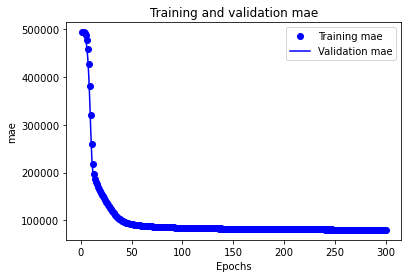

In [40]:
epochs = range(1, len(learn_mae) + 1)
plt.plot(epochs, learn_mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

#### Prediction

In [41]:
y_train_pred = ann_model.predict(X_train).flatten()
y_val_pred = ann_model.predict(X_val).flatten()
y_test_pred = ann_model.predict(X_test).flatten()

In [42]:
train_result = pd.DataFrame({'y_real':y_train, 'y_pred':y_train_pred, 'set': 'train' })
val_result = pd.DataFrame({'y_real':y_val, 'y_pred':y_val_pred, 'set': 'val' })
test_result = pd.DataFrame({'y_real':y_test, 'y_pred':y_test_pred, 'set': 'test' })

df_result = pd.concat([train_result,val_result,test_result] )
df_result['idx'] = df_result.index

df_result['residual'] = df_result['y_real'] - df_result['y_pred']

#### Diagnostics

In [43]:
from sklearn import metrics
df_g = df_result.groupby('set')

print('\n R Sq')
print(df_g.apply(lambda x: metrics.r2_score(x['y_real'], x['y_pred'])))

print('\n Root Mean Squared Error')
print(df_g.apply(lambda x: round(metrics.mean_squared_error(x['y_real'], x['y_pred'],squared=False),2)))

print('\n Mean Absolute Error')
print(df_g.apply(lambda x: round(metrics.mean_absolute_error(x['y_real'], x['y_pred']),2)))


 R Sq
set
test     0.738649
train    0.739307
val      0.739222
dtype: float64

 Root Mean Squared Error
set
test     112011.13
train    111405.65
val      109567.74
dtype: float64

 Mean Absolute Error
set
test     80860.45
train    80298.37
val      80329.61
dtype: float64


#### Residuals

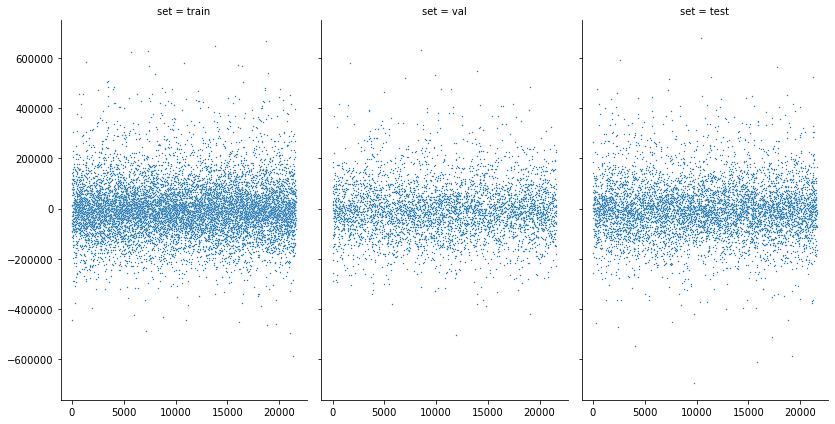

In [44]:
g = sns.FacetGrid(df_result,  col="set",height=6, aspect=.65)
g.map_dataframe(sns.scatterplot, x = 'idx', y = 'residual', s = 2)

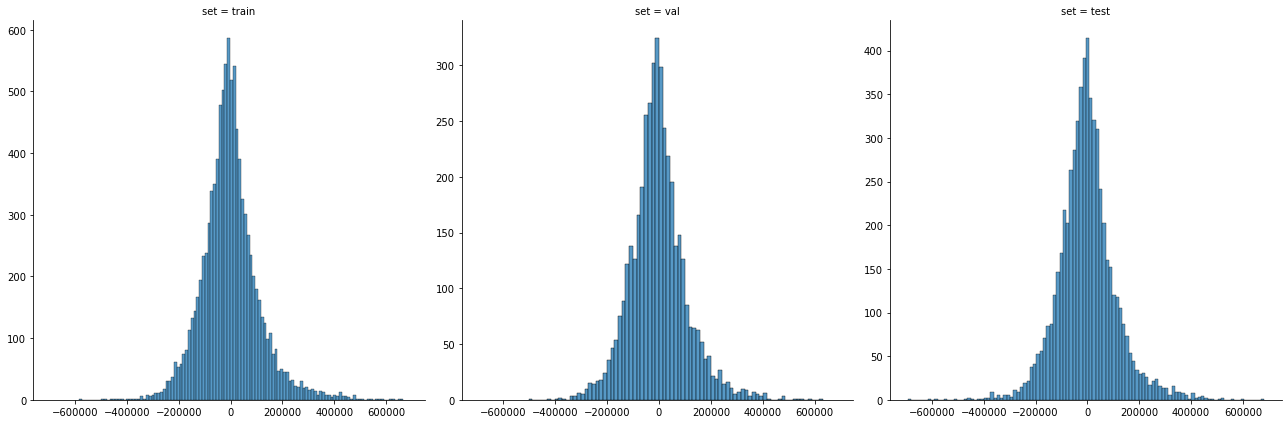

In [45]:
g = sns.FacetGrid(df_result,  col="set",height=6, aspect=1, sharey=False)
g.map_dataframe(sns.histplot, x = 'residual')

## Summary

ANN Model performs much better than Linear Regression Model, obtaining Rsq equal almost 0.74, meanwhile WLS Model gets only 0.48. In ANN Nodel we don't need to worry about collinarity among predictors and we don't need to check, whether assumptions are met. On the other hand WLS Model is easy to explain to business client, but simplifies relationship between response variable and predictor, which, as we can see from performance of non-linear model, might be definitely an excessive simplification.